## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
# Importar as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
# 1) Ler o dataset
df = pd.read_csv('housing.csv')

# 2) Remover nulos
df = df.dropna()

# 3) Dummyficar variável categórica
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# 4) Separar X e y
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# 5) Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6) Treinar a árvore de regressão
arvore = DecisionTreeRegressor(random_state=42, max_depth=8)
arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

Vamos calcular a função de custo de complexidade para a árvore e exibir os ccp_alphas

In [3]:
# 2, i) Calcular o CCP para os dados de treino e obter os parâmetros alpha e as impurezas
path = arvore.cost_complexity_pruning_path(X_train, y_train)

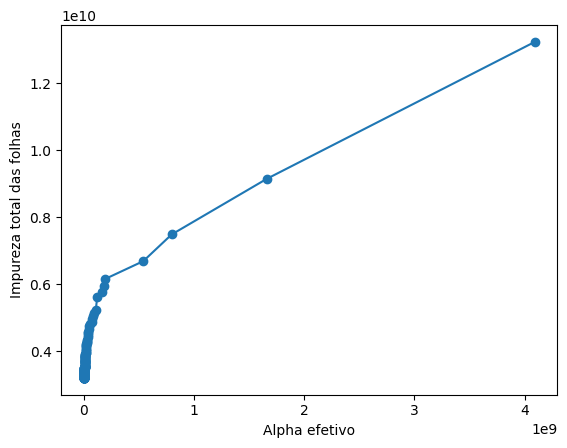

In [4]:
# 2, ii) Plotar os dados

ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.plot(ccp_alphas, impurities, marker='o')
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")
plt.show()

In [5]:
# Reduzindo a quantidade de valores de ccp_alpha
alphas_selecionados = np.unique(np.linspace(ccp_alphas.min(), ccp_alphas.max(), num=25))
len(alphas_selecionados)

25

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [6]:
# 3) Treinar uma árvore com cada valor de ccp_alpha
regressors = []

for ccp_alpha in alphas_selecionados:
    regressor = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=51)
    regressor.fit(X_train, y_train)
    regressors.append(regressor)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [7]:
# 4) Criar uma lista com os MSE's de treino e de teste pra cada árvore criada

train_scores = [mean_squared_error(y_train, regressor.predict(X_train)) for regressor in regressors]
test_scores = [mean_squared_error(y_test, regressor.predict(X_test)) for regressor in regressors]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

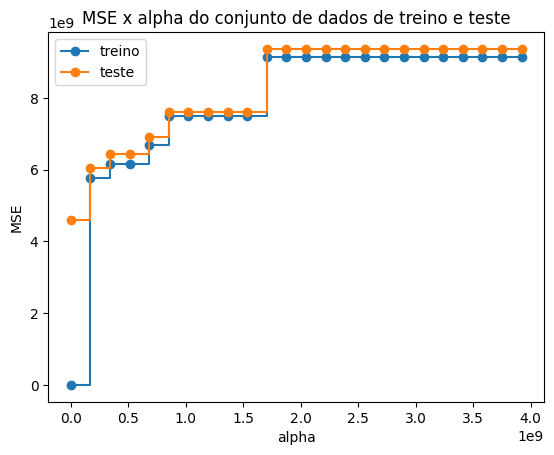

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(alphas_selecionados[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(alphas_selecionados[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Valor escolhido: 0.01

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [9]:
# 6) Criando uma árvore com o ccp_alpha escolhido anteriormente e definindo o 
arvore_nova = DecisionTreeRegressor(ccp_alpha=0.1, random_state=51)
arvore_nova.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.1, random_state=51)

In [10]:
# Calcular o R²
r2_train = arvore_nova.score(X_train, y_train)
r2_test = arvore_nova.score(X_test, y_test)

print(f"R² (treino): {r2_train:.3f}")
print(f"R² (teste): {r2_test:.3f}")

R² (treino): 1.000
R² (teste): 0.663


### 7. Visualize esta árvore.

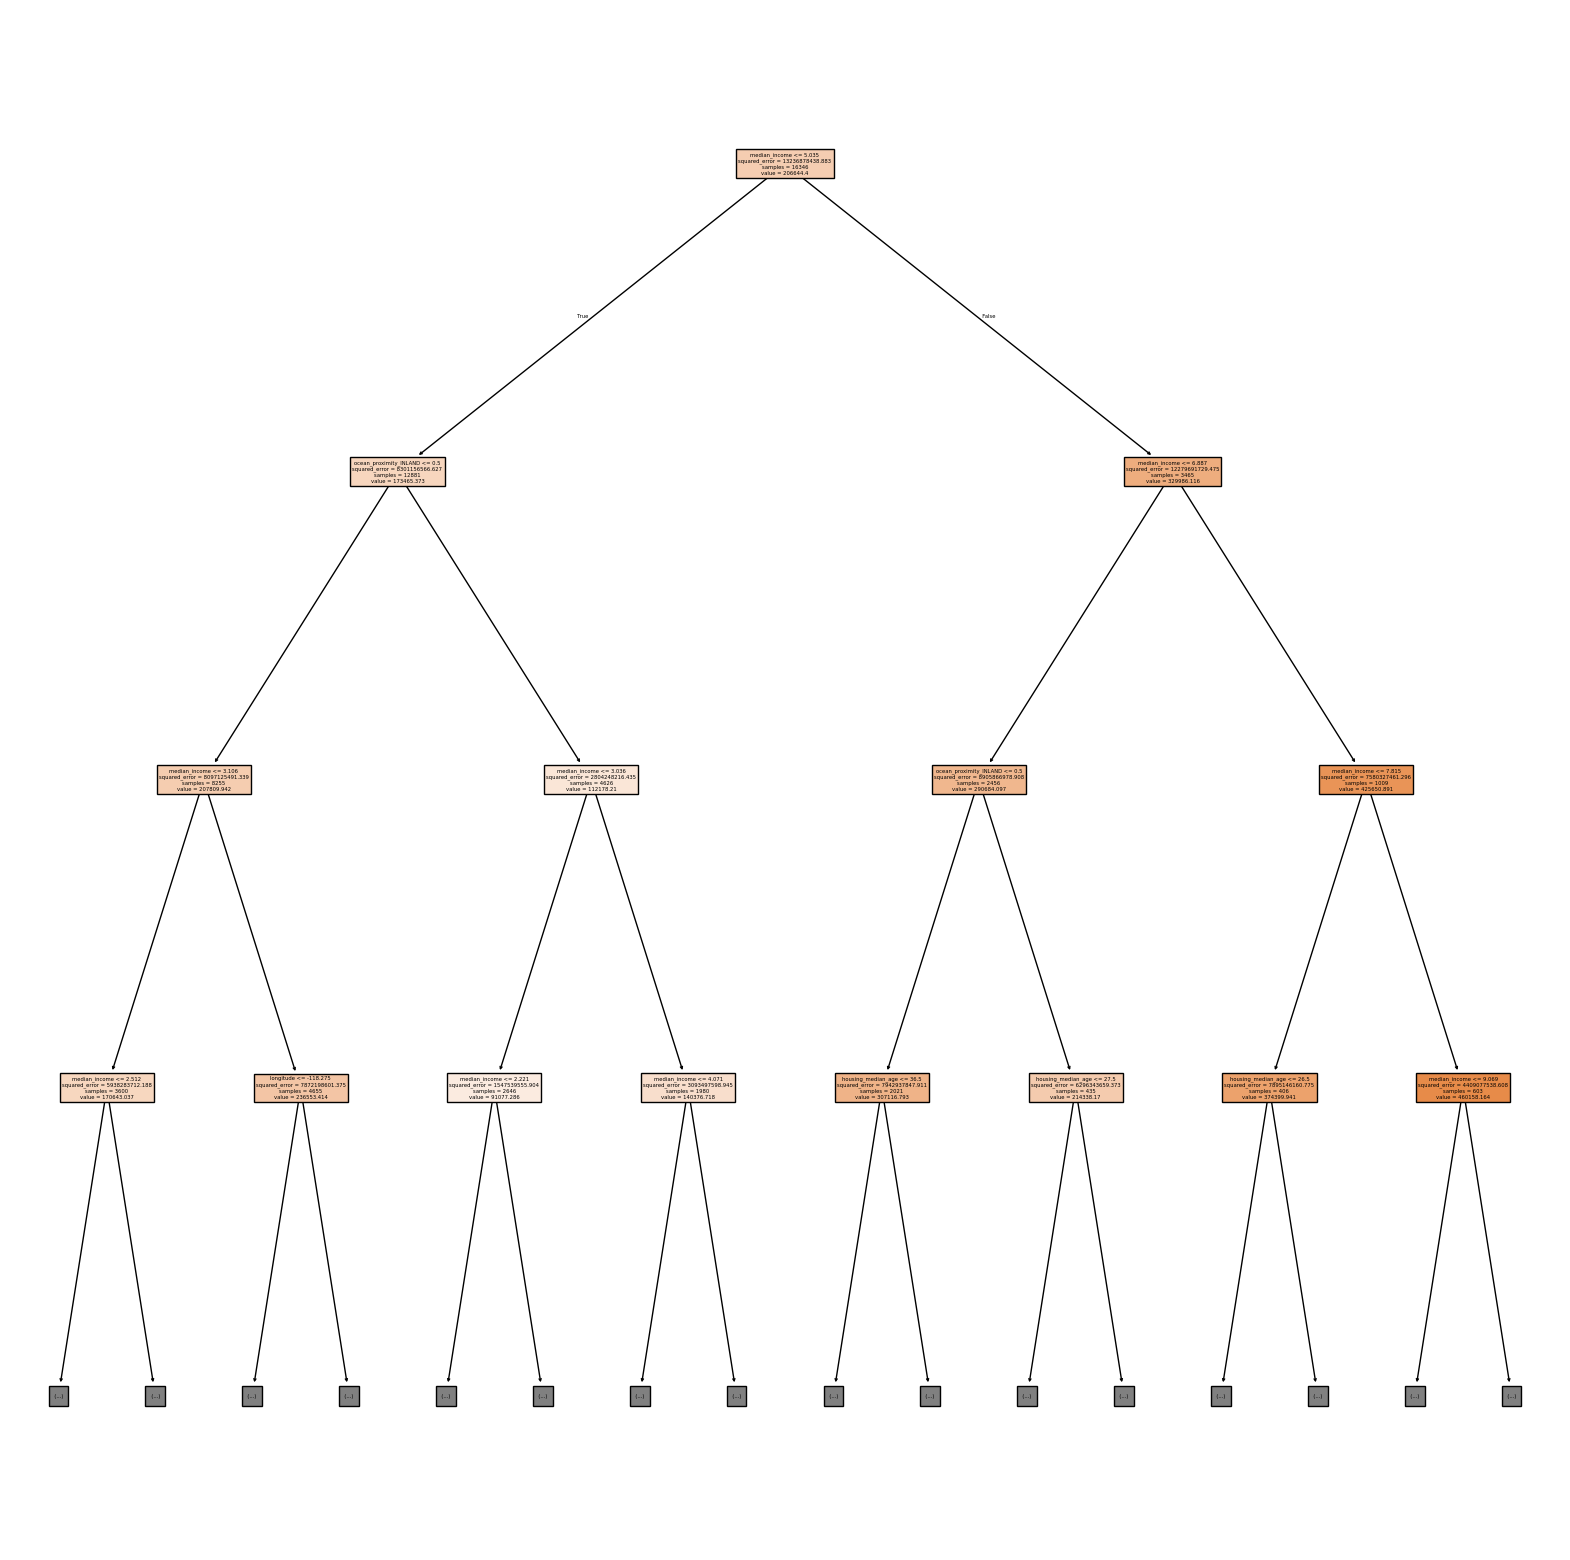

In [11]:
plt.rc('figure', figsize=(20,20))
tree.plot_tree(
    arvore_nova,
    feature_names=X.columns,
    filled=True,
    max_depth=3 # Visualizar apenas o começo da árvore para evitar travamento
)
plt.show()